In [28]:
import os
import json
import pandas as pd
from upsetplot import UpSet, from_indicators
from matplotlib import pyplot as plt
import seaborn as sns

data_dir = os.path.normpath(os.path.join(os.path.abspath(''), '..', 'data'))
graphs_dir = os.path.normpath(os.path.join(os.path.abspath(''), '..', 'graphs'))

distinct_colors = [
    "#332626", "#7f4400", "#7f7700", "#608075", "#40bfff", "#0000f2", "#ff80a2", "#735656", "#ffaa00", "#eeff00", "#40ffbf", "#0061f2", "#73698c", "#7f0011", "#ff2200", "#fff2bf", "#41f200", "#40f2ff", "#000066", "#f780ff", "#ffa280", "#332900", "#008022", "#005266", "#000073"
]

sns.reset_defaults()
sns.set_theme(context="paper", font="Gill Sans Nova", font_scale=1.1, palette="colorblind")
plt.ion()


In [2]:
def json_obj_from_file_to_matplotlib(path):
    with open(os.path.join(data_dir, path)) as f:
        data = json.load(f)
        return zip(*data.items())


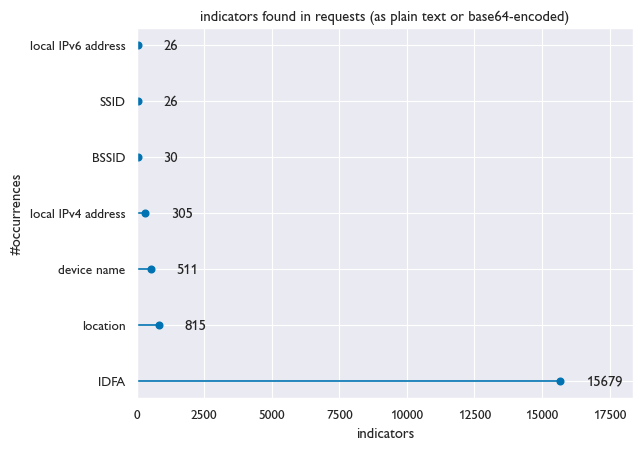

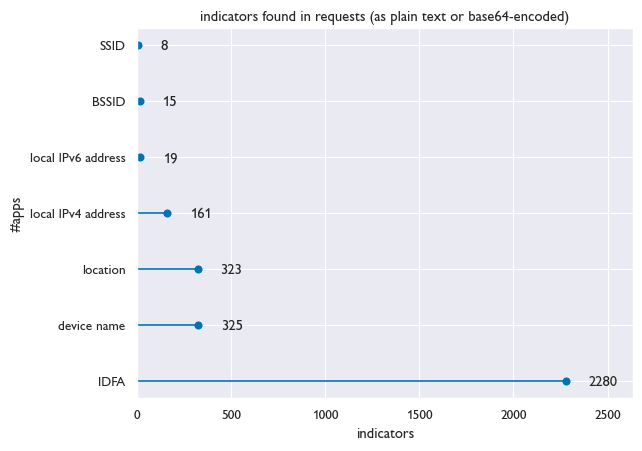

In [15]:
for type in ['occurrences', 'apps']:
    data = list(json_obj_from_file_to_matplotlib(f'indicator_{type}.json'))

    fig, ax = plt.subplots()
    ax.set_title('indicators found in requests (as plain text or base64-encoded)')
    ax.set_ylabel(f'#{type}')
    ax.set_xlabel('indicators')
    ax.stem(*data, orientation='horizontal', basefmt='none')
    _, x_max = ax.get_xlim()
    x_delta = 950 if type == 'occurrences' else 120
    ax.set_xlim(0, x_max + x_delta*2)

    for i, v in enumerate(data[1]):
        ax.text(v + x_delta, i - 0.08, str(v))


Text(0.5, 1.0, 'Consent dialog violations')

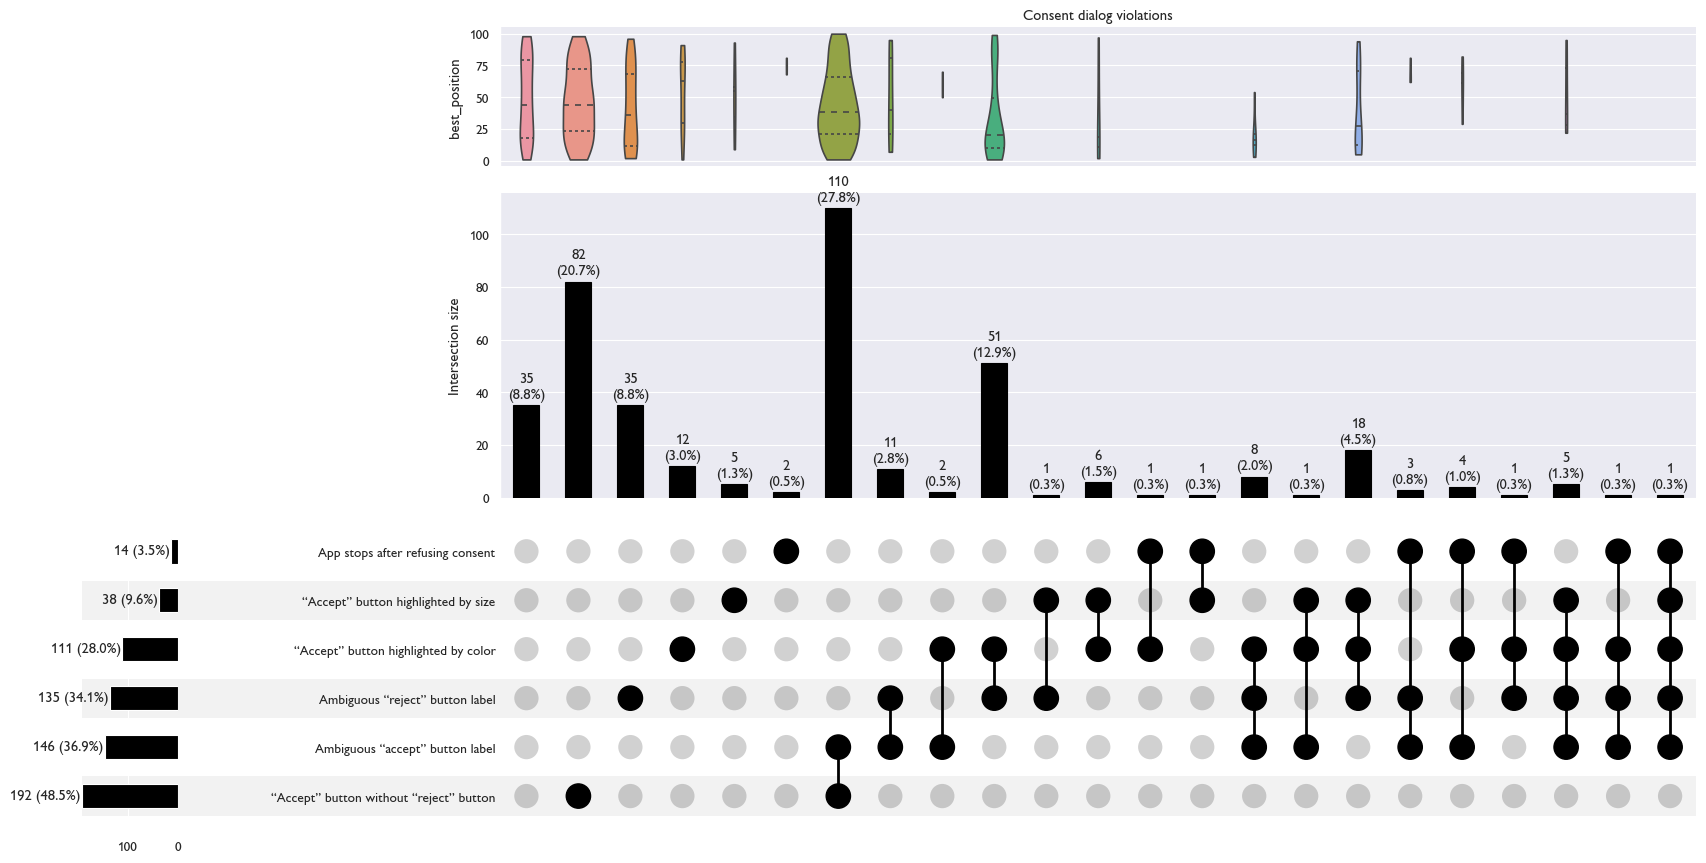

In [60]:
csv = pd.read_csv(os.path.join(data_dir, 'dialogs.csv'), on_bad_lines='error', header=0, names=[
                  'name', 'platform', 'version', 'categories', 'best_position', 'best_position_set', 'verdict', 'App stops after refusing consent', '“Accept” button highlighted by color', 'Ambiguous “accept” button label', 'Ambiguous “reject” button label', '“Accept” button highlighted by size', '“Accept” button without “reject” button'], converters={'platform': lambda p: 'Android' if p == 'android' else 'iOS'})
dialogs = csv.loc[(csv['verdict'] == 'dialog') |
                  (csv['verdict'] == 'maybe_dialog')]
data = from_indicators(
    lambda data: data.select_dtypes(bool), data=dialogs)

upset = UpSet(data, show_counts=True, show_percentages=True,
              #   intersection_plot_elements=0,
              element_size=50)
# upset.add_stacked_bars(by='platform', colors=cm.Pastel1,
#                        elements=13, title='Count by platform')
# upset.add_stacked_bars(by='best_position_set', colors=distinct_colors, elements=13, title='Count by best top chart position')
# upset.add_stacked_bars(by='categories', colors=distinct_colors, elements=13, title='Count by category')
upset.add_catplot(value='best_position', kind='violin', elements=3, cut=0, scale='count', inner='quartiles')
# upset.add_catplot(value='best_position', kind='swarm', elements=8)
upset.plot()
plt.title('Consent dialog violations')

# Note: Platform bar plot is misleading as Android has fewer apps than iOS.


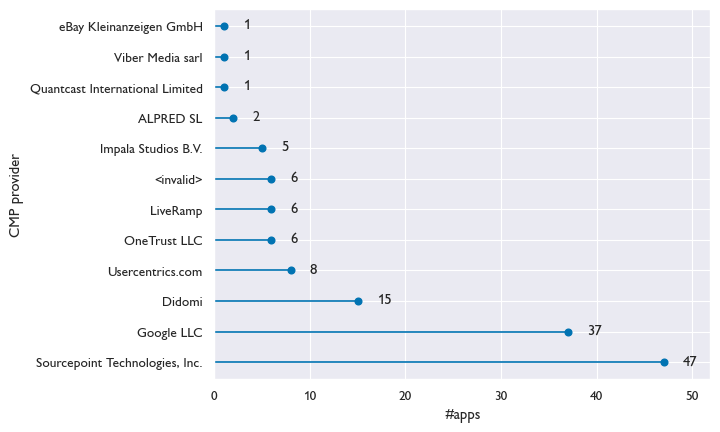

In [18]:
data = list(json_obj_from_file_to_matplotlib('tcf_cmps.json'))

fig, ax = plt.subplots()
ax.set_ylabel('CMP provider')
ax.set_xlabel('#apps')
ax.stem(*data, orientation='horizontal', basefmt='none')
_, x_max = ax.get_xlim()
ax.set_xlim(0, x_max + 2.5)

for i, v in enumerate(data[1]):
    ax.text(v + 2, i - 0.08, str(v))

fig.savefig(os.path.join(graphs_dir, 'tcf_cmps.pdf'), bbox_inches="tight")
